In [53]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [54]:
df = pd.read_csv(r"E:\Data Science by SRK\Machine_learning\Classification\Diabetes\cleaned_dataset_diabetes.csv")

In [55]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89.0,66.0,23.0,1.460250,28.1,0.861443,1.288798,0
1,0,137.0,40.0,35.0,1.532648,43.1,1.071407,1.338267,1
2,3,78.0,50.0,32.0,1.452246,31.0,0.890303,1.311941,1
3,2,197.0,70.0,45.0,1.690052,30.5,0.857475,1.392162,1
4,1,189.0,60.0,23.0,1.753669,30.1,0.926098,1.404659,1
...,...,...,...,...,...,...,...,...,...
387,0,181.0,88.0,44.0,1.681244,43.3,0.882124,1.311941,1
388,1,128.0,88.0,39.0,1.479504,36.5,1.004630,1.351088,1
389,2,88.0,58.0,26.0,1.259921,28.4,0.978030,1.293804,0
390,10,101.0,76.0,48.0,1.541485,32.9,0.863144,1.412359,0


# X and y

In [56]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

# Train Test Split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

# Modelling and evaluation

**Decision Tree classifier- with default hyperparameter**

In [58]:
# modeling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state = True)
dt_default.fit(X_train, y_train)

# Prediction
pred_train = dt_default.predict(X_train)
pred_test = dt_default.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy : ", accuracy_score(pred_train, y_train))
print("Test Accuracy : ", accuracy_score(pred_test, y_test))

from sklearn.model_selection import cross_val_score
print("cross_val_score : ", cross_val_score(dt_default, X, y, cv=5).mean())


Train Accuracy :  1.0
Test Accuracy :  0.6835443037974683
cross_val_score :  0.7221356702369361


# visualize Tree

In [59]:
X_train.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

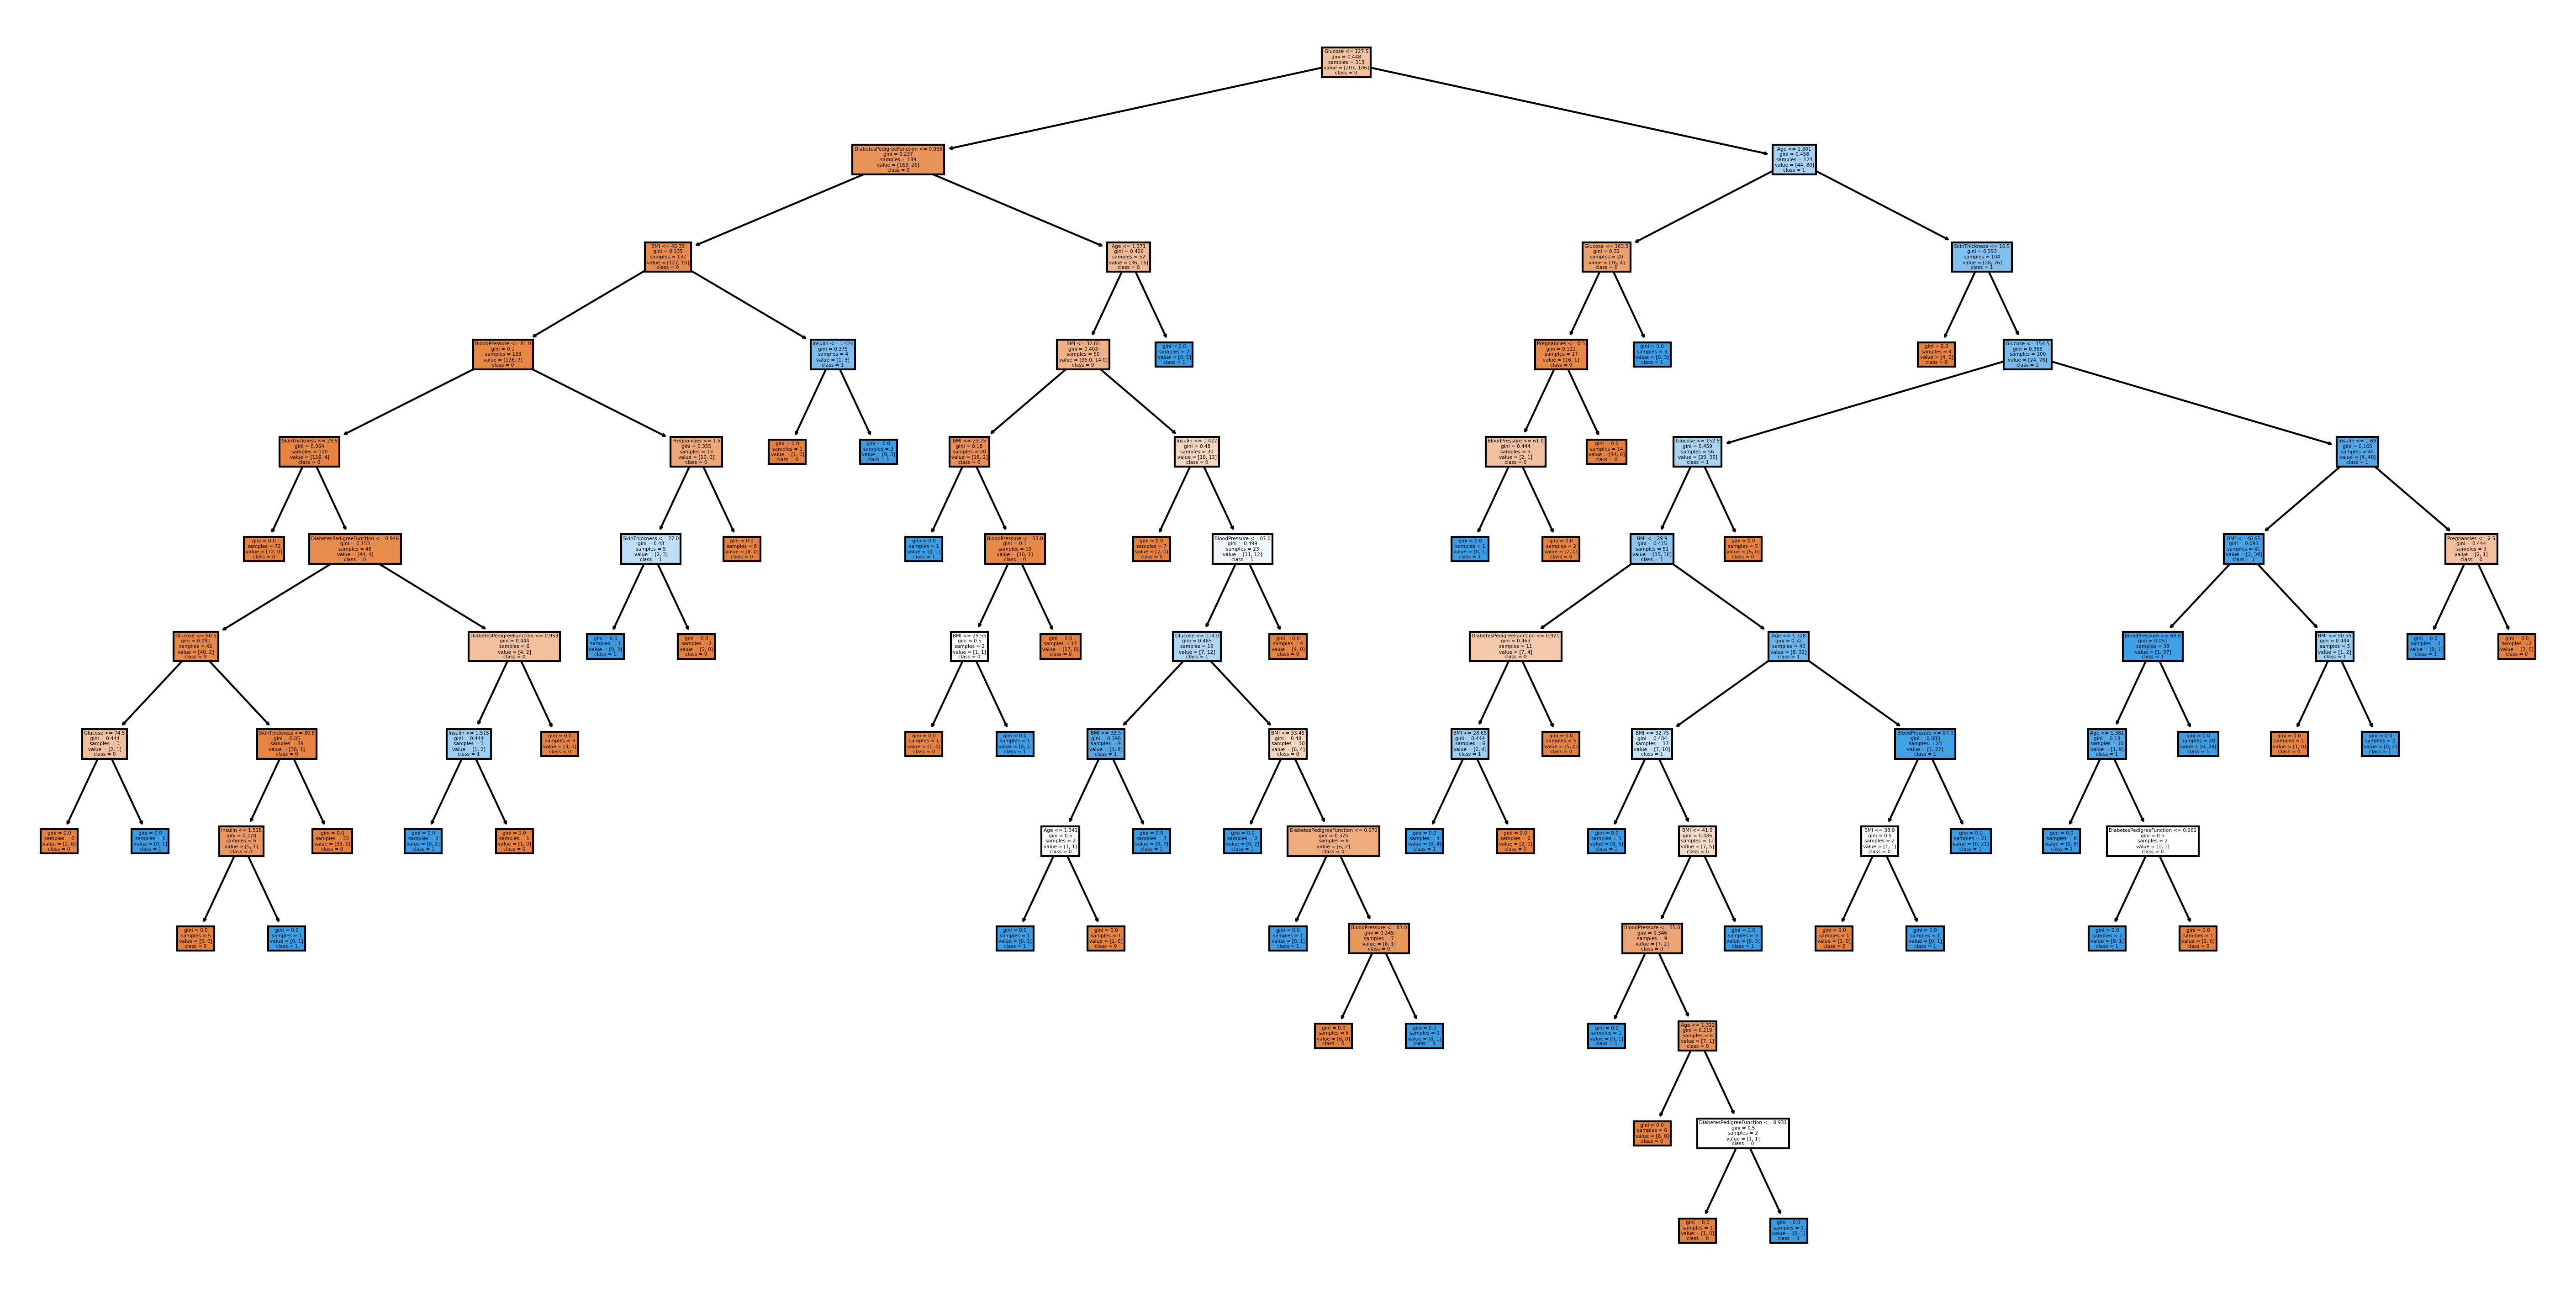

In [60]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12), dpi = 300)

plot_tree(dt_default,
         filled = True,
         feature_names = X_train.columns.tolist(),
         class_names = ['0','1']
         )
plt.show()

In [61]:
print("Depth of the tree:", dt_default.get_depth())


Depth of the tree: 12


# HyperParameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

# model
estimator = DecisionTreeClassifier(random_state = True)

# Parameters (which you want to tune and identify the best)
param_grid = {"criterion" : ['gini', 'entropy'], 
             'max_depth' : [1,2,3,4,5]}


grid = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv= 5)

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [63]:
grid.best_estimator_.feature_importances_

array([0.        , 0.644083  , 0.        , 0.06639489, 0.        ,
       0.05644122, 0.06205369, 0.1710272 ])

In [64]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                    index = X.columns,
                    columns = ['Feature Importance'])
feats_imp = feats[feats['Feature Importance'] > 0]
important_features_list = feats_imp.index.to_list()
important_features_list

['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Final Decision Tree model
**with best hyper parameters and imp_features**

In [67]:
# input with important features
X_imp = X[important_features_list]

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.2, random_state = True)

# Model with best hyperparameters
final_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = True)
final_dt_model.fit(X_train, y_train)

ypred_train = final_dt_model.predict(X_train)
ypred_test = final_dt_model.predict(X_test)

# Evaluation
print("Train Accuracy : ", accuracy_score(ypred_train, y_train))
print("Test Accuracy : ", accuracy_score(ypred_test, y_test))
print("Cross_val_score : ", cross_val_score(final_dt_model, X_imp, y, cv=5).mean())

Train Accuracy :  0.8498402555910544
Test Accuracy :  0.7721518987341772
Cross_val_score :  0.7757546251217138


In [68]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred_test)

array([[44, 11],
       [ 7, 17]], dtype=int64)